Task 1: Data Understanding and Visualization:
Download the Provided Data and Complete the following task.

1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class. You are expected to write a code:

• Get the list of class directories from the train folder.
• Select one image randomly from each class.
• Display the images in a grid format with two rows using matplotlib.
• Expected Output:

2. Check for Corrupted Image: Write a script that verifies whether the image in the train
directory are valid. If any corrupted images are found, the script must remove the image from
the directory and print the message which image have been removed, if none found print ”No
Corrupted Images Found.”
• Hint:
– Iterate through each class subdirectory and check if each image is valid.
– Use the Image.open() function to attempt to load each image.
– If the image is corrupted i.e. raises an IOError or SyntaxError, remove the image from
the directory and print f"Removed corrupted image: {image_path}".
– Maintain a list of all corrupted image paths for reporting.
• Expected Output: No corrupted images found.

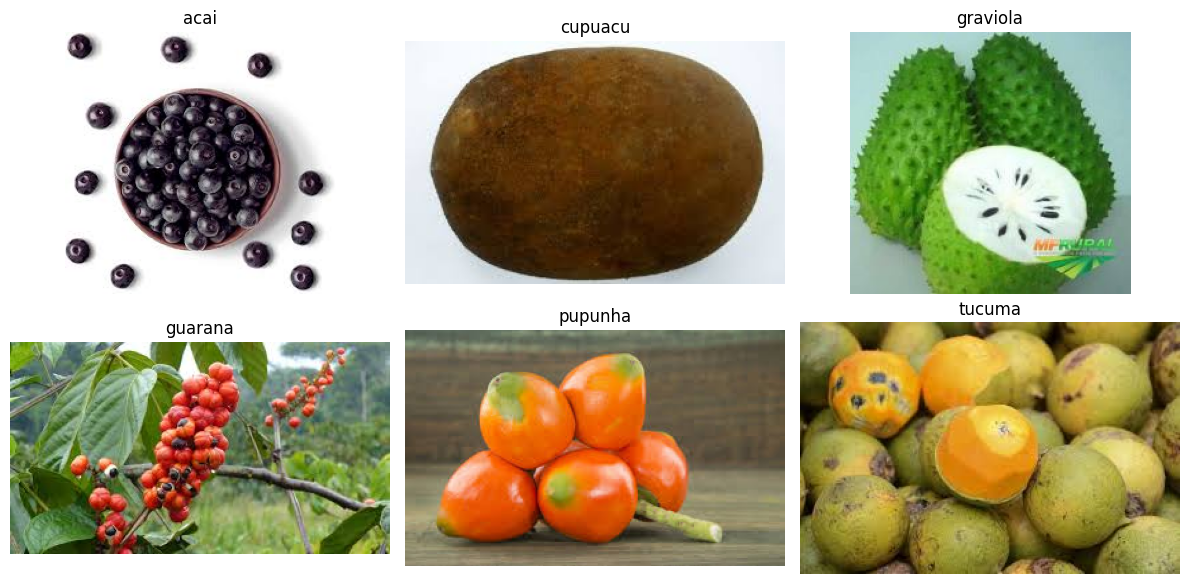

No corrupted images found.


In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError

# Define dataset path (update accordingly)
dataset_path = "/content/drive/MyDrive/FruitinAmazon/train"  # Change this to your actual dataset path

# Get class directories
class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Select one random image from each class
selected_images = []
for class_dir in class_dirs:
    class_path = os.path.join(dataset_path, class_dir)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    if images:
        selected_images.append(os.path.join(class_path, random.choice(images)))

# Display images in a grid format
fig, axes = plt.subplots(nrows=2, ncols=(len(selected_images) + 1) // 2, figsize=(12, 6))
axes = axes.flatten()

for ax, img_path in zip(axes, selected_images):
    image = Image.open(img_path)
    ax.imshow(image)
    ax.set_title(os.path.basename(os.path.dirname(img_path)))
    ax.axis("off")

# Hide any unused axes
for i in range(len(selected_images), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Checking for corrupted images
corrupted_images = []
for class_dir in class_dirs:
    class_path = os.path.join(dataset_path, class_dir)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        try:
            with Image.open(image_path) as img:
                img.verify()  # Verify if image is valid
        except (UnidentifiedImageError, IOError, SyntaxError):
            corrupted_images.append(image_path)
            os.remove(image_path)
            print(f"Removed corrupted image: {image_path}")

# Print summary
if not corrupted_images:
    print("No corrupted images found.")


Task 2: Loading and Preprocessing Image Data in keras:
In this section, we will load and preprocess image data from a directory using the image dataset from directory function in Keras.

This function is used to load images from a directory structure where subdirectories represent different classes. We will also apply basic preprocessing, including resizing and batching and normalization of images. The same function can be used to load train and validation data.


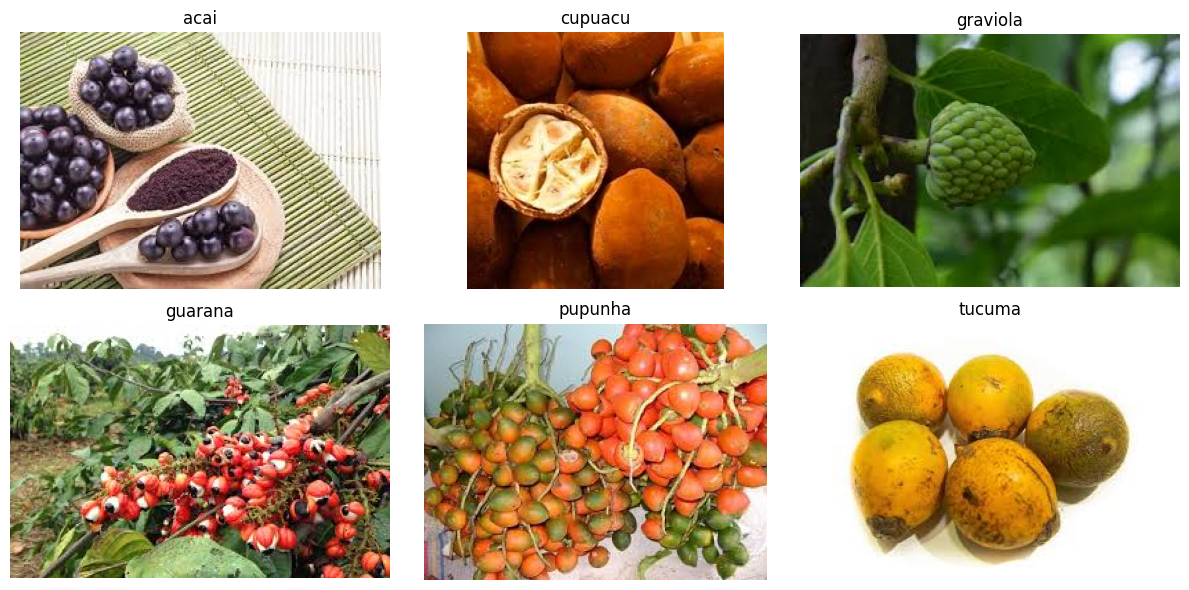

No corrupted images found.
Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError
import tensorflow as tf

# Define dataset path (update accordingly)
dataset_path = "/content/drive/MyDrive/FruitinAmazon/train"  # Change this to your actual dataset path

# Get class directories
class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Select one random image from each class
selected_images = []
for class_dir in class_dirs:
    class_path = os.path.join(dataset_path, class_dir)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    if images:
        selected_images.append(os.path.join(class_path, random.choice(images)))

# Display images in a grid format
fig, axes = plt.subplots(nrows=2, ncols=(len(selected_images) + 1) // 2, figsize=(12, 6))
axes = axes.flatten()

for ax, img_path in zip(axes, selected_images):
    image = Image.open(img_path)
    ax.imshow(image)
    ax.set_title(os.path.basename(os.path.dirname(img_path)))
    ax.axis("off")

# Hide any unused axes
for i in range(len(selected_images), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Checking for corrupted images
corrupted_images = []
for class_dir in class_dirs:
    class_path = os.path.join(dataset_path, class_dir)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        try:
            with Image.open(image_path) as img:
                img.verify()  # Verify if image is valid
        except (UnidentifiedImageError, IOError, SyntaxError):
            corrupted_images.append(image_path)
            os.remove(image_path)
            print(f"Removed corrupted image: {image_path}")

# Print summary
if not corrupted_images:
    print("No corrupted images found.")

# Define image size and batch size
img_height = 128  # Example image height
img_width = 128   # Example image width
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Task 3 - Implement a CNN with
Follow the following Structure and Hyper - parameters:

Convolutional Architecture:
• Convolutional Layer 1:
– Filter Size (F): (3, 3)
– Number of Filters (k): 32
– Padding (P): same
– Stride (s): 1

• Activation Layer: ReLU activation
• Pooling Layer 1: Max pooling
– Filter Size (F): (2, 2)
– Stride (s): 2

• Convolutional Layer 2:
– Filter Size (F): (3, 3)
– Number of Filters (k): 32
– Padding (P): same
– Stride (s): 1
• Activation Layer: ReLU activation
• Pooling Layer 2: Max pooling
– Filter Size (F): (2, 2)
– Stride (s): 2

Fully Connected Network Architecture:
• Flatten Layer: Flatten the input coming from the convolutional layers
• Input Layer:
• Hidden Layer - 2:
– Number of Neurons: 64
– Number of Neurons: 128
• Output Layer:
– Number of Neurons: num classes (number of output classes)

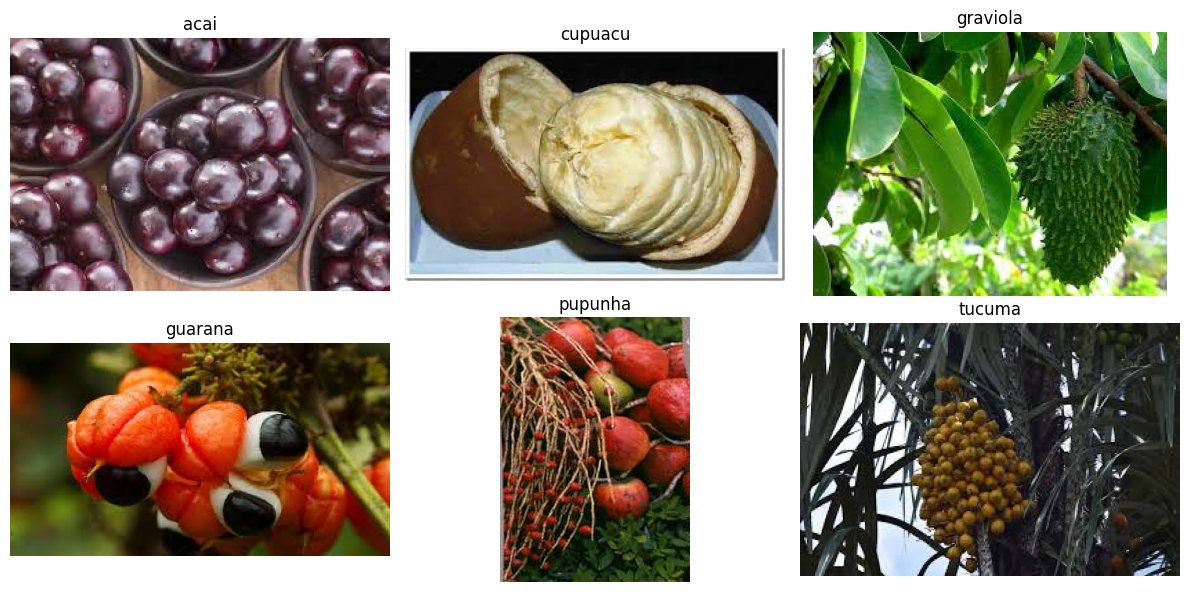

No corrupted images found.
Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define dataset path (update accordingly)
dataset_path = "/content/drive/MyDrive/FruitinAmazon/train"  # Change this to your actual dataset path

# Get class directories
class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Select one random image from each class
selected_images = []
for class_dir in class_dirs:
    class_path = os.path.join(dataset_path, class_dir)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    if images:
        selected_images.append(os.path.join(class_path, random.choice(images)))

# Display images in a grid format
fig, axes = plt.subplots(nrows=2, ncols=(len(selected_images) + 1) // 2, figsize=(12, 6))
axes = axes.flatten()

for ax, img_path in zip(axes, selected_images):
    image = Image.open(img_path)
    ax.imshow(image)
    ax.set_title(os.path.basename(os.path.dirname(img_path)))
    ax.axis("off")

# Hide any unused axes
for i in range(len(selected_images), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Checking for corrupted images
corrupted_images = []
for class_dir in class_dirs:
    class_path = os.path.join(dataset_path, class_dir)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        try:
            with Image.open(image_path) as img:
                img.verify()  # Verify if image is valid
        except (UnidentifiedImageError, IOError, SyntaxError):
            corrupted_images.append(image_path)
            os.remove(image_path)
            print(f"Removed corrupted image: {image_path}")

# Print summary
if not corrupted_images:
    print("No corrupted images found.")

# Define image size and batch size
img_height = 128  # Example image height
img_width = 128   # Example image width
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

# Define CNN model
num_classes = len(class_dirs)
model = keras.Sequential([
    keras.Input(shape=(img_height, img_width, 3)),  # Corrected input layer
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Task 4: Compile the Model
Model Compilation
• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).
Task 4: Train the Model
Model Training
• Use the model.fit() function to train the model. Set the batch size to 16 and the number of epochs
to 250.
• Use val ds for validation.

• Use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoid-
ing overfitting.

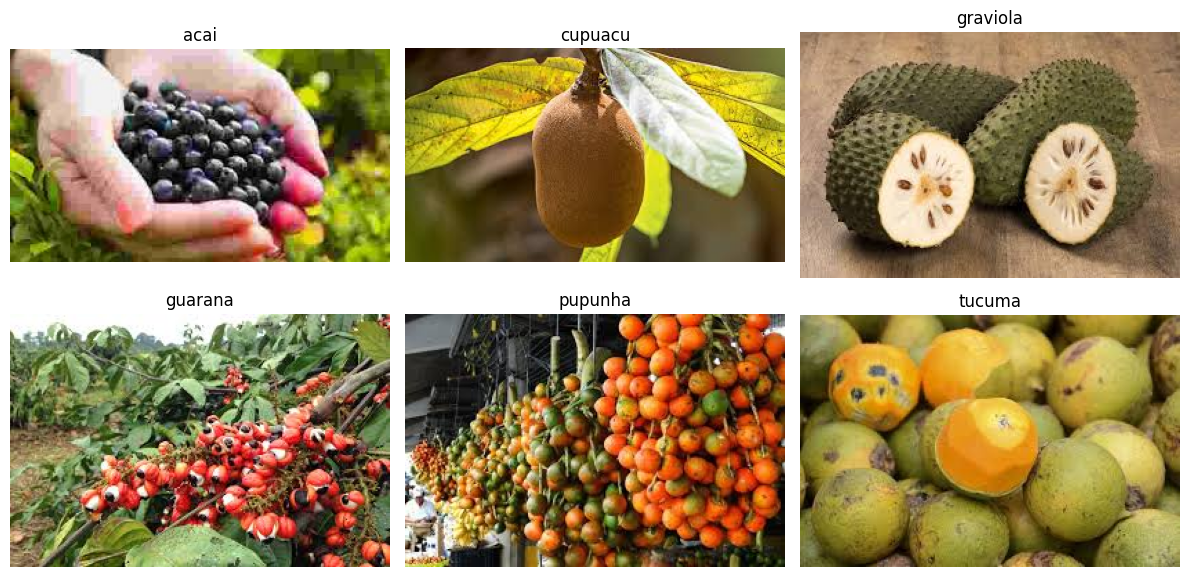

No corrupted images found.
Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.1740 - loss: 2.0585

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 421ms/step - accuracy: 0.1727 - loss: 2.0650 - val_accuracy: 0.0556 - val_loss: 1.8602
Epoch 2/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.2740 - loss: 1.7386

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 577ms/step - accuracy: 0.2769 - loss: 1.7366 - val_accuracy: 0.0000e+00 - val_loss: 1.8525
Epoch 3/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.3326 - loss: 1.6648

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 416ms/step - accuracy: 0.3374 - loss: 1.6596 - val_accuracy: 0.0556 - val_loss: 1.8363
Epoch 4/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.3830 - loss: 1.4511

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 332ms/step - accuracy: 0.3909 - loss: 1.4456 - val_accuracy: 0.2222 - val_loss: 1.6577
Epoch 5/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.6510 - loss: 1.1059

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 361ms/step - accuracy: 0.6536 - loss: 1.1033 - val_accuracy: 0.6111 - val_loss: 0.9123
Epoch 6/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.7130 - loss: 0.8787 - val_accuracy: 0.3889 - val_loss: 1.7265
Epoch 7/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.6458 - loss: 0.7262

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 362ms/step - accuracy: 0.6424 - loss: 0.7329 - val_accuracy: 0.8889 - val_loss: 0.5367
Epoch 8/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step - accuracy: 0.9251 - loss: 0.4334 - val_accuracy: 0.5556 - val_loss: 1.0478
Epoch 9/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9132 - loss: 0.3255

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 547ms/step - accuracy: 0.9091 - loss: 0.3322 - val_accuracy: 0.8889 - val_loss: 0.5037
Epoch 10/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.9622 - loss: 0.2320

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 331ms/step - accuracy: 0.9569 - loss: 0.2428 - val_accuracy: 0.8889 - val_loss: 0.4858
Epoch 11/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 304ms/step - accuracy: 0.9881 - loss: 0.1543 - val_accuracy: 0.6667 - val_loss: 1.1078
Epoch 12/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.9899 - loss: 0.0871

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 369ms/step - accuracy: 0.9893 - loss: 0.0880 - val_accuracy: 0.8889 - val_loss: 0.4693
Epoch 13/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 486ms/step - accuracy: 1.0000 - loss: 0.0571 - val_accuracy: 0.8333 - val_loss: 0.5892
Epoch 14/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - accuracy: 1.0000 - loss: 0.0297 - val_accuracy: 0.8889 - val_loss: 0.5328
Epoch 15/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 0.8889 - val_loss: 0.5003
Epoch 16/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 298ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 0.8889 - val_loss: 0.5142
Epoch 17/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 302ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.8889 - val_loss: 0.5379
Epoch 18/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 521ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.8889 - val_loss: 0.5686
Epoch 19/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.8889 - val_lo

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# Define dataset path (update accordingly)
dataset_path = "/content/drive/MyDrive/FruitinAmazon/train"  # Change this to your actual dataset path

# Get class directories
class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Select one random image from each class
selected_images = []
for class_dir in class_dirs:
    class_path = os.path.join(dataset_path, class_dir)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    if images:
        selected_images.append(os.path.join(class_path, random.choice(images)))

# Display images in a grid format
fig, axes = plt.subplots(nrows=2, ncols=(len(selected_images) + 1) // 2, figsize=(12, 6))
axes = axes.flatten()

for ax, img_path in zip(axes, selected_images):
    image = Image.open(img_path)
    ax.imshow(image)
    ax.set_title(os.path.basename(os.path.dirname(img_path)))
    ax.axis("off")

# Hide any unused axes
for i in range(len(selected_images), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Checking for corrupted images
corrupted_images = []
for class_dir in class_dirs:
    class_path = os.path.join(dataset_path, class_dir)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        try:
            with Image.open(image_path) as img:
                img.verify()  # Verify if image is valid
        except (UnidentifiedImageError, IOError, SyntaxError):
            corrupted_images.append(image_path)
            os.remove(image_path)
            print(f"Removed corrupted image: {image_path}")

# Print summary
if not corrupted_images:
    print("No corrupted images found.")

# Define image size and batch size
img_height = 128  # Example image height
img_width = 128   # Example image width
batch_size = 16
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

# Define CNN model
num_classes = len(class_dirs)
model = keras.Sequential([
    keras.Input(shape=(img_height, img_width, 3)),  # Corrected input layer
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Define callbacks
checkpoint_cb = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Task 5: Evaluate the Model
Model Evaluation
• After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.

Task 6: Save and Load the Model
Model Saving and Loading
• Save the trained model to an .h5 file using model.save().
• Load the saved model and re-evaluate its performance on the test set.

Task 7: Predictions and Classification Report
Making Predictions
• Use model.predict() to make predictions on test images.
• Convert the model’s predicted probabilities to digit labels using np.argmax().
• Also use from sklearn.metrics import classification report to report the Classification
Report of your Model Performance.

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
# Evaluate model
test_loss, test_accuracy = model.evaluate(val_ds)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

# Save model
model.save("trained_model.h5")

# Load and re-evaluate model
loaded_model = keras.models.load_model("trained_model.h5")
test_loss, test_accuracy = loaded_model.evaluate(val_ds)
print(f"Reloaded Model - Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

# Make predictions
predictions = loaded_model.predict(val_ds)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.concatenate([y for x, y in val_ds], axis=0)

# Classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8843 - loss: 0.4838 


Test Accuracy: 0.8889, Test Loss: 0.4693


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8843 - loss: 0.4838 
Reloaded Model - Test Accuracy: 0.8889, Test Loss: 0.4693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           4       1.00      0.67      0.80         3
           5       0.93      0.93      0.93        15

    accuracy                           0.89        18
   macro avg       0.64      0.53      0.58        18
weighted avg       0.94      0.89      0.91        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
